# Abgabe 2: Klassische Mechanik 2

**Teammitglieder:** René Zarwel, Matthias Kastenmüller

<br>

Importieren allgemein benötigter Bibliotheken:

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pylab as pylab
import numpy.polynomial.polynomial as poly
import numpy as np
from scipy.integrate import odeint
import math
from numpy import array, polyval, polyfit
import vpython as vp         # get VPython modules for animation
vec=vp.vector

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Aufgabe 1: Umlaufzeit

Die gegebene Formel $T=Cr^n$ ist eine Potenzfunktion. Diese wird bei doppelt logarithmischer Darstellung zu einer Geraden. Dies ergibt sich aus folgendem Zusammenhang:

$$
T = C \cdot R^n \Longrightarrow t = log(C) + n \cdot r
$$

Damit kann durch logarithmieren der Daten die Steigung $n$ über die Lösung einer Geradengleichung mit den ersten beiden Messpunkten berechnet werden. Anschließend muss nur die $log(C)$ Verschiebung der Geraden ermittelt werden. Durch einfaches Umstellen der Gleichung und Einsetzen eines Punktes lässt sich dies lösen.

C=17.187437007248548 und n=1.508036297446902
Für den Wert T=6.2 ergibt sich ein r=0.5085811166787044


Text(0,0.5,'Umlaufzeit (T)')

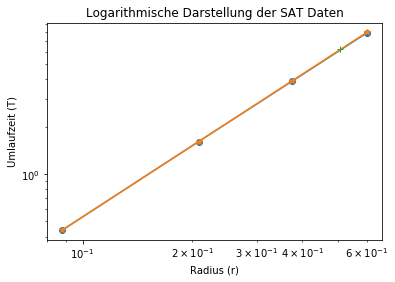

In [2]:
# Gegebene Funktion & Umgestellt nach r
T = lambda r,C,n: C*r**n
r = lambda T,C,n: (T/C)**(1/n)

# Eingangsdaten
Tdata = array([0.44, 1.61, 3.88, 7.89])
rdata = array([0.088, 0.208, 0.374, 0.600])

# Logarithmische Darstellung der Daten
plt.loglog(rdata, Tdata, 'o-')

# Logarithmieren der Eingangsdaten
TdataLog = np.log(Tdata)
rdataLog = np.log(rdata)

# Lösen durch Geradengleichung und Verschiebung
n = (TdataLog[0]-TdataLog[1])/(rdataLog[0]-rdataLog[1])
C = Tdata[0]/rdata[0]**n
print("C=" + str(C) + " und n=" + str(n))
plt.loglog(rdata, T(rdata,C,n), '*-')

# Berechnung des fehlenden Wertes
Tmiss = 6.20
rmiss = r(6.2,C,n)
print("Für den Wert T=" + str(Tmiss) + " ergibt sich ein r=" + str(rmiss))
plt.loglog(rmiss, Tmiss, '+')

# Plot Beschriftung
plt.title('Logarithmische Darstellung der SAT Daten')
plt.xlabel('Radius (r)')
plt.ylabel('Umlaufzeit (T)')

Wie in der oberen Grafik zu sehen ist, liegen alle Messpunkte (blau) auf der Geraden, obwohl für die Berechnung nur die ersten beiden Messpunkte verwendet wurden. Damit kann davon ausgegangen werden, dass sich die Daten mit der geg. Funktion darstellen lassen. 

Der fehlende Radius konnte durch Umstellen der Gleichung leicht ermittelt werden. (Siehe Ausgabe)  
Zusätzlich wurde er in der Grafik als grünes Kreuz dargestellt.

## Aufgabe 2

In [3]:

g=9.81
G=6.67408*10**-11
mErde=5.972*10**24
mSonne=1.989*10**30

In [4]:
G

6.674079999999999e-11

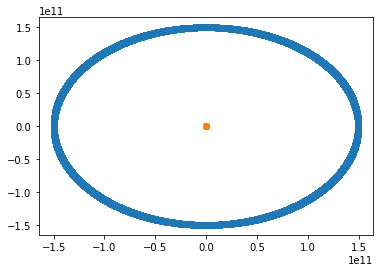

In [5]:
factor = 3600 
yearsTimeSpan = 5
deltaT = 1 * factor

def distance(p1, p2):
    return math.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)

def direction(p1, p2):
    return [p2[0] - p1[0], p2[1] - p1[1]]

def acceleration(mOwn, pOwn, mOther, pOther):
    intermed = -G * mOther / (distance(pOwn, pOther)**3)
    return [element * intermed for element in direction(pOther, pOwn)]

def calc(vErde, vSonne, pErde, pSonne):
    koordsSonne = [[pSonne[0], pSonne[1], vSonne[0], vSonne[1]]]
    koordsErde  = [[pErde[0], pErde[1], vErde[0], vErde[1]]]

    for x in range(0, int(yearsTimeSpan * 365 * 24 * 3600 / factor)):
        deltaTNeu = deltaT / 2
        pErde = [pErde[0] + deltaTNeu * vErde[0], pErde[1] + deltaTNeu * vErde[1]]
        acc = acceleration(mErde, pErde, mSonne, pSonne)
        vErde = [vErde[0] + deltaT * acc[0], vErde[1] + deltaT * acc[1]] 
        pErde = [pErde[0] + deltaTNeu * vErde[0], pErde[1] + deltaTNeu * vErde[1]]

        pSonne = [pSonne[0] + deltaTNeu * vSonne[0], pSonne[1] + deltaTNeu * vSonne[1]]
        acc = acceleration(mSonne, pSonne, mErde, pErde)
        vSonne = [vSonne[0] + deltaT * acc[0], vSonne[1] + deltaT * acc[1]] 
        pSonne = [pSonne[0] + deltaTNeu * vSonne[0], pSonne[1] + deltaTNeu * vSonne[1]]

        
        koordsErde.append([pErde[0], pErde[1], vErde[0], vErde[1]])
        koordsSonne.append([pSonne[0], pSonne[1], vSonne[0], vSonne[1]])

    return [koordsErde, koordsSonne]
            
def calcAlt(vErde, vSonne, pErde, pSonne):
    koordsSonne = [[pSonne[0], pSonne[1], vSonne[0], vSonne[1]]]
    koordsErde  = [[pErde[0], pErde[1], vErde[0], vErde[1]]]

    for x in range(0, int(yearsTimeSpan * 365 * 24 * 3600 / factor)):
        aErde  = acceleration(mErde, pErde, mSonne, pSonne)
        aSonne = acceleration(mSonne, pSonne, mErde, pErde)

        vErde = [vErde[0] + aErde[0] * deltaT, vErde[1] + aErde[1] * deltaT]
        vSonne = [vSonne[0] + aSonne[0] * deltaT, vSonne[1] + aSonne[1] * deltaT]

        pErde = [pErde[0] + vErde[0] * deltaT, pErde[1] + vErde[1] * deltaT]
        pSonne = [pSonne[0] + vSonne[0] * deltaT, pSonne[1] + vSonne[1] * deltaT]
    
        koordsErde.append([pErde[0], pErde[1], vErde[0], vErde[1]])
        koordsSonne.append([pSonne[0], pSonne[1], vSonne[0], vSonne[1]])
    return [koordsErde, koordsSonne]
    
vErde  = [0.0, 29.8 * 10**3]
vSonne = [0.0, 0.0]
pErde  = [1.4960*(10**11), 0.0]
pSonne = [0.0, 0.0]
data = calc(vErde, vSonne, pErde, pSonne)

plt.scatter([element[0] for element in data[0]], [element[1] for element in data[0]])       
plt.scatter([element[0] for element in data[1]], [element[1] for element in data[1]])      


Wie zu erwarten war, ist zu erkennen, dass die Erde die Sonne umkreist. Die Bahn der Sonne fällt auf einen Punkt zusammen, da sie aufgrund ihrer sehr hohen Masse eine Bahn mit sehr geringen Durchmesser durchläuft. Wird nur die Bahn der Sonne eingezeichnet so erhällt man folgendes:

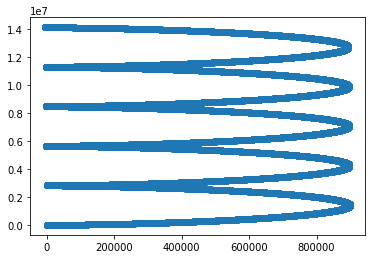

In [6]:
plt.scatter([element[0] for element in data[1]], [element[1] for element in data[1]])      


Dieses Ergebnis ist auf dem ersten Blick sehr überraschend, da eine Ellipsenbahn von uns erwartet wurde. 
Da zum Zeitpunkt t=0 die Sonne ihre Geschwindigkeit v=0 gesetzt wurde, aber die Erde bereits in Bewegung war und alle Impulse in der Summe 0 ergeben müssen, bedeutet das, dass der Schwerpunk des Systems zum Zeitpunkt t=0 in Bewegung sein musste.

Diese Tatsache wurde in obiger Kalkulation nicht berücksichtigt.
Führt man selbige Berechnung mit einer Anfangsgeschwindigkeit für die Sonne durch, so dass ihr Impuls betraglich dem der Erde entspricht, so erhällt man folgendes Ergebnis:

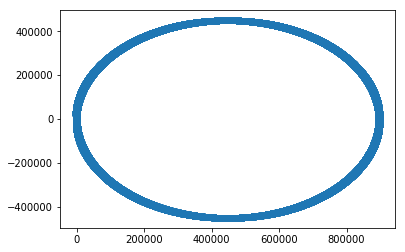

In [7]:
vErde  = [0.0, 29.8 * 10**3]
vSonne = [-mErde / mSonne * vErde[0], -mErde / mSonne * vErde[1]]
pErde  = [1.4960*(10**11), 0.0]
pSonne = [0.0, 0.0]
data = calc(vErde, vSonne, pErde, pSonne)
plt.scatter([element[0] for element in data[1]], [element[1] for element in data[1]])      


Da der Schwerpunk nun ruhend ist, entsteht der zunächst erahnte Effekt, dass die Sonne eine Ellipsenbahn vollzieht.

Um das System nun zu validieren, wird nun der Impuls über alle Messwerte errechnet. Dieser muss für alle Messwerte den gleichen Wert ergeben:

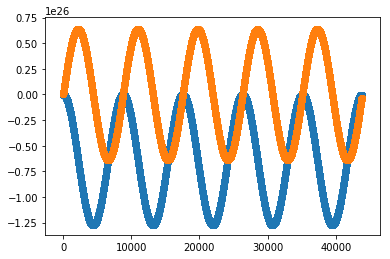

In [8]:
def impuls(masse, geschwindigkeit):
    return masse * geschwindigkeit

sumImpulseX = []
sumImpulseY = []

for index in range(0, len(data[0])):
    sumImpulseX.append(impuls(mErde, data[0][index][2]) + impuls(mSonne, data[1][index][2]))
    sumImpulseY.append(impuls(mErde, data[0][index][3]) + impuls(mSonne, data[1][index][3]))

plt.scatter(range(0, len(data[0])), sumImpulseX)
plt.scatter(range(0, len(data[0])), sumImpulseY)

Da der Impulserhaltungssatz gilt, müssen die einzelnen Messwerte um einen konstanten Wert fluktuieren. Da das Bezugssystem ruhend und keine weiteren Einflüsse neben Sonne und Erde eingegangen sind, ist der konstante Wert 0.
Die Größenordnung des Fehlers erscheint zunächst erschreckend, im Verhälltnis zum letzten errechneten Wert für den Impuls der Sonne zeigt sich jedoch:

In [9]:
[impuls(mSonne, data[1][-1][2]), impuls(mSonne, data[1][-1][3])]

[-9.858194840248786e+27, -1.7769567493221588e+29]

Der letzte errechnete Impuls der Sonne bewegt sich hier bei 1e27 bzw 1e29. Ein Fehler in der Größenordnung von 1e15 ist also vernachlässigbar.

Eine weitere Kontrolle der numerischen Berechnung kann mithilfe des Energieerhaltungssatzes vorgenommen werden. Da weder Energie dem System hinzugefügt noch entfernt wird, muss diese über alle Berechnungen hinweg konstant bleiben. Für eine vollständige Berechnung muss im vorliegenden Fall die chinetische und die potenzielle Energie betrachtet werden.

-2.647554454998686e+33

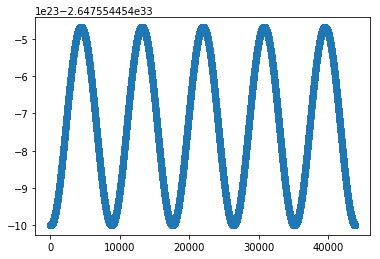

In [10]:
def potEnergie(masse1, masse2, distanz):
    return -G * masse1 * masse2 / distanz

def chinEnergie(masse, geschwindigkeit):
    return 0.5 * masse * geschwindigkeit ** 2

sumEnergie = []
for index in range(0, len(data[0])):
    distanceSonneErde = distance(data[0][index], data[1][index])
    sumEnergie.append(
    chinEnergie(mErde, math.sqrt(data[0][index][2]**2 + data[0][index][3]**2))
    +chinEnergie(mSonne, math.sqrt(data[1][index][2]**2 + data[1][index][3]**2))
    +potEnergie(mSonne, mErde, distanceSonneErde)
    )
plt.scatter(range(0, len(data[0])), sumEnergie)
sumEnergie[-1]


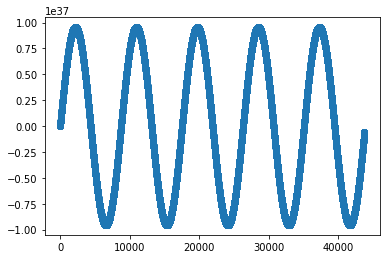

In [11]:
ls = []

for index in range(0, len(data[0])):
    px = impuls(mErde, data[0][index][2]) + impuls(mSonne, data[1][index][2])
    py = impuls(mErde, data[0][index][3]) + impuls(mSonne, data[1][index][3])
    direc = direction(data[0][index], data[1][index])
    l = px*direc[1] - py*direc[0]
    ls.append(l)

plt.scatter(range(0, len(data[0])), ls)

## Aufgabe 3

Der Ort eines Objekts lässt sich über Polarkoordinaten ausdrücken.
Der radiale Vektor sowie die Position auf der Kreisbahn lassen sich wie folgt ausdrücken:

\begin{align}
\vec{e_r} = \vec{e_x} * cos(\varphi) + \vec{e_y} * sin(\varphi)\\
\vec{e_\varphi} = -\vec{e_x} * sin(\varphi) + \vec{e_y} * cos(\varphi)
\end{align}

Als lineares Gleichungssystem ergibt sich nun:

\begin{align}
\vec{e_r} = \left( \begin{array}{c}
  \cos(\varphi) \\
  \sin(\varphi) \\
\end{array} \right) 
\end{align}

\begin{align}
\vec{e_\varphi} = \left( \begin{array}{c}
  -sin(\varphi) \\
  \cos(\varphi) \\
\end{array} \right) 
\end{align}

Durch Ableiten erhält man die Geschwindigkeiten:

\begin{align}
\dot{\vec{e_r}} = \left( \begin{array}{c}
  -\sin(\varphi) * \dot{\varphi} \\
  \cos(\varphi) * \dot{\varphi} \\
\end{array} \right) = \dot{\varphi} * \left( \begin{array}{c}
  -\sin(\varphi) \\
  \cos(\varphi) \\
\end{array} \right) = \dot{\varphi} * \vec{e_\varphi}
\end{align}

\begin{align}
\dot{\vec{e_\varphi}} = \left( \begin{array}{c}
-\cos(\varphi) * \dot{\varphi}\\
 -\sin(\varphi) * \dot{\varphi} \\
\end{array} \right) = - \dot{\varphi} * \vec{e_r}
\end{align}

Daraus ergibt sich die radiale Winkelgeschwindigkeit:

\begin{align}
\left( \begin{array}{c}
  \dot{x} \\
  \dot{y} \\
\end{array} \right) = \dot{r} * \vec{e_r} + r \dot{\varphi} \vec{e_\varphi}
\end{align}

Durch erneute Ableitung erhält man die Beschleunigung

\begin{align}
\left( \begin{array}{c}
  \ddot{x} \\
  \dot{y} \\
\end{array} \right) = \ddot{r}\vec{e_r} + \dot{r} \dot{\varphi} \vec{e_\varphi} + r\ddot{\varphi}\vec{e_\varphi} + r\dot{\varphi}(-\dot{\varphi}\vec{e_r}) = (\ddot{r} - r\dot{\varphi}^2)\vec{e_r} + (2r\ddot{\varphi} + r \dot{\varphi}) \vec{e_\varphi}
\end{align}

Daraus ergibt sich die Radialkraft(Beschleunigung vom Körper weg)

\begin{align}
F_r = m (\ddot{\vec{r}} - r\dot{\varphi}^2)
\end{align}

sowie die Winkelkraft (Beschleunigung in Bewegungsrichtung)

\begin{align}
F_\varphi = m (r\ddot{\varphi} + 2r\dot{\varphi})
\end{align}

Die Radialkraft wirkt der Anziehungskraft der 2 Körper entgegen, sie heben sich also gegenseitig auf und bleibt über die Zeit immer 0. Die potentielle Energie ändert sich also nicht:
    
\begin{align}
m (\ddot{\vec{r}} - r\dot{\varphi}^2) = -G \frac{mM}{r^2}
\end{align}

Die Winkelkraft bleibt immer 0. Das bedeutet es wirkt keine Bescheunigung in Richtung der Kreisbahn. Die Geschwindigkeit bleibt gleich:

\begin{align}
m (r\ddot{\varphi} + 2r\dot{\varphi}) = 0
\end{align}

__Energieerhaltungssatz__

\begin{align}
E = E_{pot}  + E_{kin}\\
E = 1/2 * m * v^2 - \frac{GmM}{r^2}
\end{align}

In Polarkoordinaten:
\begin{align}
E = m/2(\dot{r^2} + (r\dot{\varphi})^2) - \frac{GmM}{r^2}
\end{align}

Für diese Formel ergibt sich durch Ableitung nach der Zeit:
\begin{align}
\frac{dE}{dt} = 0
\end{align}

__Impulserhaltungssatz__

Ein Impuls wird beschrieben mit:
\begin{align}
L = m  + v\\
\end{align}

In Polarkoordinaten:
\begin{align}
L = m (\ddot{\vec{r}} - r\dot{\varphi}^2)
\end{align}

Abgeleitet nach der Zeit ergibt sich
\begin{align}
\frac{dL}{dt} = 0
\end{align}


__Drehimpuls__

Der Drehimpuls in Polarkoordinaten wird wie folgt beschrieben:
    
\begin{align}
L = m r^2 \dot{\varphi}
\end{align}

Durch Ableitung nach der Zeit

\begin{align}
\frac{dL}{dt}
\end{align}

ergibt sich:

\begin{align}
m2r\dot{r}\dot{\varphi} + mr^2\ddot{\varphi}\\
mr(2\dot{r}\dot{\varphi} + r\ddot{\varphi}) = 0
\end{align}

## Aufgabe 4

In den folgenden Berechnungen wurde die Anfangsgeschwindigkeit der Erde von $10 \cdot 10^3 m/s$ bis $40 \cdot 10^3m/s$ variiert. Zusätzlich wurden 2 Grenzfälle betrachtet. 

Ein Wert kleiner $10 \cdot 10^3 m/s$ hat sich als nicht zielführend erwiesen, da die Bahn der Erde damit unmittelbar durch die Sonne verläuft. So erfährt die Erde im Mittelpunkt der Sonne eine gegen Unendlich gehende Beschleunigung und wird aus dem System katapultiert. Dies ist eine Beschränkung des Modells, da in der Realität beide Planeten kolliedieren würden. 

Ein Wert größer $40 \cdot 10^3 m/s$ hat sich auch nicht als zielführend erwiesen, da durch den extrem starken Impuls die Erde aus dem System fliegt und die Anziehung der Sonne dem zu schwach entgegen wirkt.

Im folgenden werden die Variationen berechnet und als Plot dargestellt:

(-500000000000, 500000000000)

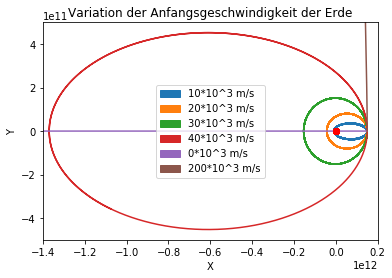

In [12]:
mErde=5.972*10**24
mSonne=1.989*10**30
yearsTimeSpan = 20

def calcAndPlotEarthMov(v, col):
    vErde  = [0.0, v]
    vSonne = [-mErde / mSonne * vErde[0], -mErde / mSonne * vErde[1]]
    pErde  = [1.4960*(10**11), 0.0]
    pSonne = [0.0, 0.0]
    data = calc(vErde, vSonne, pErde, pSonne)
    plt.plot([element[0] for element in data[0]], [element[1] for element in data[0]], '-', color=col)       
    plt.plot([element[0] for element in data[1]], [element[1] for element in data[1]], 'ro')     

calcAndPlotEarthMov(10  * 10**3, 'C0')
calcAndPlotEarthMov(20  * 10**3, 'C1')
calcAndPlotEarthMov(30  * 10**3, 'C2')
calcAndPlotEarthMov(40  * 10**3, 'C3')
#Grenzfälle
calcAndPlotEarthMov(0   * 10**3, 'C4')
calcAndPlotEarthMov(200 * 10**3, 'C5') 

# Plot Beschriftung
plt.title('Variation der Anfangsgeschwindigkeit der Erde')
plt.xlabel('X')
plt.ylabel('Y')

patch1 = mpatches.Patch(color='C0', label='10*10^3 m/s')
patch2 = mpatches.Patch(color='C1', label='20*10^3 m/s')
patch3 = mpatches.Patch(color='C2', label='30*10^3 m/s')
patch4 = mpatches.Patch(color='C3', label='40*10^3 m/s')
patch5 = mpatches.Patch(color='C4', label='0*10^3 m/s')
patch6 = mpatches.Patch(color='C5', label='200*10^3 m/s')
plt.legend(handles=[patch1,patch2,patch3,patch4,patch5,patch6])

axes = plt.gca()
axes.set_xlim([-1.4*10**12,0.2*10**12])
axes.set_ylim([-5*10**11,5*10**11])

In der obigen Grafik ist ersichtlich, dass bei einer geringen Anfangsgeschwindigkeit, hier $10 \cdot 10^3 m/s$, die Erde nahe an der Sonne vorbeifliegt und in einem sog. Swing-By Geschwindigkeit aufnimmt. So ergibt sich eine elliptische Kurvenbahn. Bei einer Geschwindigkeit von $30 \cdot 10^3 m/s$ ist der Impuls mit der Anziehungskraft ausgeglichen, wodurch sich eine kreisförmige Kurvenbahn ergibt. Durch weitere Steigung der Anfangsgeschwindigkeit entfernt sich die Erde zunächst stark von der Sonne. Durch die wirkende Anziehungskraft wird die Erde jedoch wieder zurück gezogen, wodurch sich auch hier eine elliptische Kurvenbahn ergibt. 

Der erste Grenzfall mit fehlender Anfangsgeschwindigkeit wurde bereits oben beschrieben. In der Grafik sieht man einen geraden Flug durch die Sonne. Auch der zweite Grenzfall mit einer gegen unendlich gehenden Anfangsgeschwindigkeit, hier beispielhaft $200 \cdot 10^3 m/s$, wurde bereits erläutert. Hier ist er durch einen geraden Flug aus dem System ersichtlich.

## Aufgabe 5

Im folgenden Modell entspricht das Gewicht der Sonne fast der Erde. Anschließend wird die Anfangsgeschwindigkeit variiert, wodurch sich unterschiedliche Flugbahnen ergeben.

Dabei wurden die Grenzfälle nicht als Plot dargestellt, da diese dem Experiment aus der vorhergehenden Aufgabe entsprichen.

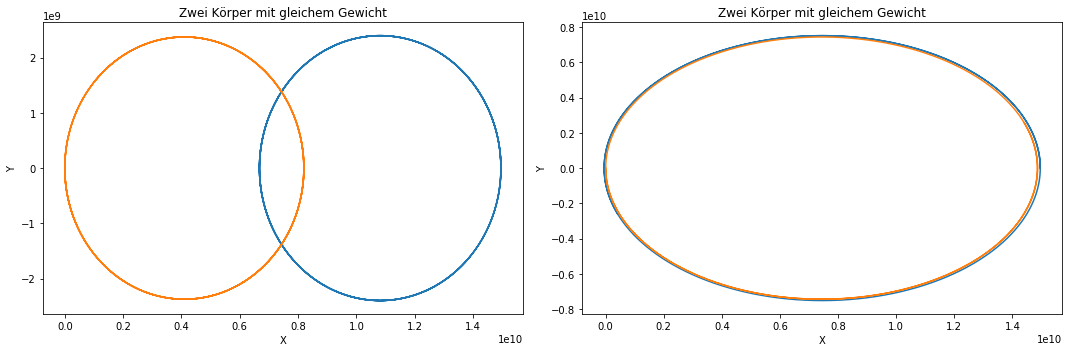

In [13]:
def calcAndPlotSameWeightMov(vE, mErde, mSonne):
    vErde  = [0.0, vE]
    vSonne = [-mErde / mSonne * vErde[0], -mErde / mSonne * vErde[1]]
    pErde  = [1.4960*(10**10), 0.0]
    pSonne = [0.0, 0.0]
    yearsTimeSpan = 20
    data = calc(vErde, vSonne, pErde, pSonne)
    plt.plot([element[0] for element in data[0]], [element[1] for element in data[0]], '-')       
    plt.plot([element[0] for element in data[1]], [element[1] for element in data[1]], '-')  
    # Plot Beschriftung
    plt.title('Zwei Körper mit gleichem Gewicht')
    plt.xlabel('X')
    plt.ylabel('Y')

#Config
mErde=5.972*10**24
mSonne=mErde * 1.01
plt.subplots(figsize=(15, 5))

#Swing-By Bewegung
plt.subplot(121)
v  = 5 * 10**1
calcAndPlotSameWeightMov(v, mErde, mSonne)

#Bewegung auf der selben Bahn
plt.subplot(122)
v  = 11.62 * 10**1
calcAndPlotSameWeightMov(v, mErde, mSonne)

plt.tight_layout()

Bei einer geringen Anfangsgeschwindigkeit ergibt sich eine nebenläufige Flugbahn der Planeten. Durch einen Swing-By entfernen sich beide Planeten wieder voneinandern. Durch die fast gleichen Massen ergeben sich jedoch gleich große Flugkurven. Würde die Masse variiert werden, würde das Radius-Verhältnis entgegengesetzt zum Masse-Verhältnis sein. Somit ist, wie bei der Erde und Sonne, der Radius des leichteren Körpers größer, als der des schwereren.

Im zweiten Bild ergibt sich durch eine perfekte Anfangsgschwindigkeit eine gleiche Flugbahn für beide Körper. Die Planeten verlaufen auf der jeweils entgegengesetzten Seite und behalten somit die gleiche Flugbahn.

## Aufgabe 6: Drei Sterne

Auf den Stern 1 wirkt die Anziehungskraft von Stern 2 und Stern 3. Zusammen ergeben sie die auf den Stern 1 wirkende Kraft:

$$
\vec{F_1} = m_1 \cdot \ddot{r} = \vec{F_{12}} + \vec{F_{13}}
$$

Damit kann jede wirkende Anziehungskraft separat betrachtet werden. Durch einsetzen der jeweils wirkenden Anziehungskraft ergibt sich folgende Gleichung:

$$
m_1 \cdot \ddot{r} = G\frac{m_2 \cdot m_1}{r_{12}^3}\vec{r_{12}} + G\frac{m_3 \cdot m_1}{r_{13}^3}\vec{r_{13}}
$$

Da $m_1$ auf der rechten Seite ausgeklammert werden kann und somit auf beiden Seiten gleichermaßen vorkommt, kann es aufgehoben werden. Desweiteren ersetzen wir die Richtungsvektoren $\vec{r_{12}}$ und $\vec{r_{13}}$ durch die Berechnung aus den Positionsvektoren. Gleichermaßen wird mit den im Nenner vorhandenen Längen der Richtungsvektoren verfahren. Somit ergibt sich die gegebene Gleichung:

$$
\ddot{\vec{r_1}} = Gm_2\frac{\vec{r_2}-\vec{r_1}}{|\vec{r_2}-\vec{r_1}|^3}+Gm_3\frac{\vec{r_3}-\vec{r_1}}{|\vec{r_3}-\vec{r_1}|^3}
$$

Allgemein kann die Gleichung auch folgendermaßen fomuliert werden:

$$
\ddot{\vec{r_1}} = G \displaystyle\sum_{i=2}^{n} m_i\frac{\vec{r_i}-\vec{r_1}}{|\vec{r_i}-\vec{r_1}|^3} \\
n = \text{ Anzahl der Sterne}
$$

Dies kann auf die anderen Sterne übertragen werden und somit ergeben sich für Stern 2 und 3 folgende Bewegungsgleichungen:

$$
\ddot{\vec{r_2}} = Gm_1\frac{\vec{r_1}-\vec{r_2}}{|\vec{r_1}-\vec{r_2}|^3}+Gm_3\frac{\vec{r_3}-\vec{r_2}}{|\vec{r_3}-\vec{r_2}|^3} \\
\ddot{\vec{r_3}} = Gm_1\frac{\vec{r_1}-\vec{r_3}}{|\vec{r_1}-\vec{r_3}|^3}+Gm_2\frac{\vec{r_2}-\vec{r_3}}{|\vec{r_2}-\vec{r_3}|^3}
$$

### Plot der Bewegung

Im folgenden wird die Bewegung der 3 Sterne für 4 Sekunden berechnet und geplottet. Die Berechnung erfolgt analog zum zuvor beschriebenen Modell.

Bemerkung: Je nach gewählter Diskretisierung verändert sich die Bewegung stark, da in großen Schritten von gleicher Geschwindigkeit ausgegangen wird. So ziehen sich bei großem Delta die Planeten zunächst in direkter Richtung an und stoßen sich anschließend sehr schnell außerhalb des Systems. Aus diesem Grund wurde hier eine sehr kleines Delta gewählt.

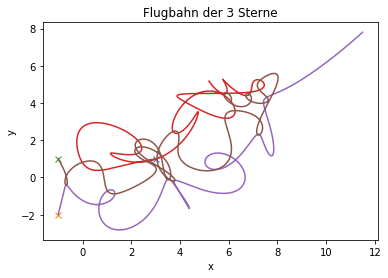

In [14]:
def leapfrog(lfdiffeq, r1, v1, r2, r3, h):       # vectorized leapfrog
    """ vector leapfrog method using numpy arrays.
        It solves general (r,v) ODEs as: 
        dr[i]/dt = f[i](v), and dv[i]/dt = g[i](r).
        User supplied lfdiffeq(id, r, v, t) returns
        f[i](r) if id=0, or g[i](v) if id=1.
        It must return a numpy array if i>1 """
    hh = h/2.0
    r11 = r1 + hh*lfdiffeq(0, r1, r2, r3, v1)     # 1st: r at h/2 using v0    @\lbl{line:lf1}@
    v11 = v1 +  h*lfdiffeq(1, r11, r2, r3, v1)  # 2nd: v1 using a(r) at h/2 @\lbl{line:lf2}@
    r11 = r11 + hh*lfdiffeq(0, r1, r2, r3, v11)   # 3rd: r1 at h using v1     @\lbl{line:lf3}@
    return r11, v11
  
     
def star(id, r1, r2, r3, v):            # return the eqns of motion
    if (id == 0): return v         # velocity, dr/dt
    r12 = r2 - r1
    r13 = r3 - r1
    s12 = vp.mag(vec(r12[0],r12[1],0))   # $s=|\vec{r}|$
    s13 = vp.mag(vec(r13[0],r13[1],0))   # $s=|\vec{r}|$
    return m2*r12/(s12*s12*s12) + m3*r13/(s13*s13*s13)         # accel dv/dt, faster than s**3  

# Startpositions
r1 = [np.array([3.0, 1.0])] 
v1 = np.array([0.0, 0.0]) 
r2 = [np.array([-1.0, -2.0])] 
v2 = np.array([0.0, 0.0]) 
r3 = [np.array([-1.0, 1.0])] 
v3 = np.array([0.0, 0.0])
m1 = 150
m2 = 200
m3 = 250
t, h = 0.0, 1.5/20000

while t < 4:
    r1_tmp, v1 = leapfrog(star, r1[-1], v1, r2[-1], r3[-1], h)  # integrate 
    r1.append(r1_tmp)
    r2_tmp, v2 = leapfrog(star, r2[-1], v2, r1[-1], r3[-1], h)  # integrate 
    r2.append(r2_tmp)
    r3_tmp, v3 = leapfrog(star, r3[-1], v3, r1[-1], r2[-1], h)  # integrate 
    r3.append(r3_tmp)
    t += h
    
plt.title('Flugbahn der 3 Sterne')
plt.ylabel('y')
plt.xlabel('x')
plt.plot(r1[0][0], r1[0][1], 'x')
plt.plot(r2[0][0], r2[0][1], 'x')
plt.plot(r3[0][0], r3[0][1], 'x')
plt.plot([v[0] for v in r1], [v[1] for v in r1])
plt.plot([v[0] for v in r2], [v[1] for v in r2])
plt.plot([v[0] for v in r3], [v[1] for v in r3])

Man sieht, dass die Planten sich von der Startposition (Makierung 'X') anziehen und aufgrund der unterschiedlichen Massen und Entfernungen mehrfach aneinander in einem Swing-by vorbeifliegen. Durch die 3 Planeten ist das System jedoch um einiges chaotischer, als das aus den vorhergehenden Experimenten.

Diese Bewegung wird im folgenden als Animation dargestellt.

In [15]:
# draw the scene              
scene = vp.canvas(title='Planetary motion',          # scene start 
                   background=vec(.2,.5,1), forward=vec(0,2,-1))
star1 = vp.sphere(pos=vec(r1[0][0],r1[0][1],0), radius=0.1, make_trail=True, up=vec(0,0,1))
star2 = vp.sphere(pos=vec(r2[0][0],r2[0][1],0), radius=0.1, make_trail=True, up=vec(0,0,1))
star3 = vp.sphere(pos=vec(r3[0][0],r3[0][1],0), radius=0.1, make_trail=True, up=vec(0,0,1))
sunlight = vp.local_light(pos=vec(0,0,0), color=vp.color.yellow) #scn end 

for i in range(len(r1)):
    vp.rate(500)   # limit animation speed

    star1.pos = vec(r1[i][0],r1[i][1],0)           # move planet  
    star2.pos = vec(r2[i][0],r2[i][1],0)           # move planet  
    star3.pos = vec(r3[i][0],r3[i][1],0)           # move planet  

        

<IPython.core.display.Javascript object>